In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
modelo = pd.read_csv('Projeto_Awari_abril_tratada_aux15.csv', sep=';')
modelo.head()

,Unnamed: 0,Preço_hoje,Liquidez_media,P/L,P/VP,Dy 12m 2021,Dl/Pl_hoje,Lpa_2020,Lpa_2019,Setor
0,ABEV3,15.25,324841037,21.08,3.19,0.0322,-0.19,0.72,0.75,2
1,AGRO3,30.47,20812315,12.82,2.23,0.0233,0.44,3.14,2.10,2
2,ALUP11,25.94,18565417,8.07,0.85,0.0324,0.77,3.21,3.04,4
3,ALUP3,8.47,150042,7.90,0.83,0.0331,0.77,1.07,1.01,4
4,ALUP4,8.75,209723,8.17,0.86,0.0320,0.77,1.07,1.01,4


In [3]:
lista_tickers = modelo['Unnamed: 0'].tolist()
lista_setores = modelo['Setor'].tolist()

In [4]:
# dicionario com as ações por linha a serem substituidas
index_stocks = []
index_tickers = {}
for i, v in zip((range(len(lista_tickers))), lista_tickers):
    index_tickers[i] = v
    index_stocks.append(index_tickers)
#index_tickers

In [5]:
nome_setores = {0: 'Saúde',
                1: 'Financeiro e Outros',
                2: 'Consumo não Cíclico',
                3: 'Bens Industriais',
                4: 'Utilidade Pública',
                5: 'Consumo Cíclico',
                6: 'Materiais Básicos',
                7: 'Petróleo. Gás e Biocombustíveis',
                8: 'Tecnologia da Informação',
                9: 'Comunicações'}

In [6]:
modelo = modelo.set_index('Unnamed: 0')

In [7]:
modelo = modelo.drop(['Preço_hoje', 'Liquidez_media', 'Setor'], axis=1)

In [8]:
modelo.head()

,P/L,P/VP,Dy 12m 2021,Dl/Pl_hoje,Lpa_2020,Lpa_2019
Unnamed: 0,,,,,,
ABEV3,21.08,3.19,0.0322,-0.19,0.72,0.75
AGRO3,12.82,2.23,0.0233,0.44,3.14,2.10
ALUP11,8.07,0.85,0.0324,0.77,3.21,3.04
ALUP3,7.90,0.83,0.0331,0.77,1.07,1.01
ALUP4,8.17,0.86,0.0320,0.77,1.07,1.01


## KMeans

In [9]:
from sklearn.cluster import KMeans

In [10]:
X = modelo.values

1 15083.494116592528
2 8623.122071715175
3 5220.843237590852
4 3287.3580014666986
5 2418.6991009525373
6 1912.251189254626
7 1497.5658650752505
8 1337.2148874991253
9 1739.5030753642718
10 1015.9697751458649


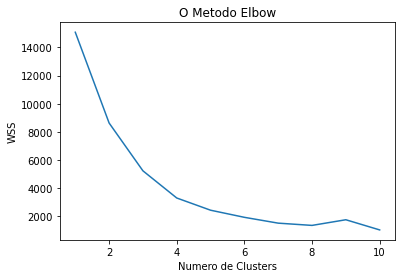

In [11]:
# Método Elbow
# O método Elbow se trata de uma técnica interessante para encontrar o valor ideal do parâmetro k.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print(i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

## Escolha baseada no método elbow, 3 clusters

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'random')

In [13]:
kmeans.fit(X)

KMeans(init='random', n_clusters=3)

In [14]:
kmeans.cluster_centers_

array([[ 8.25333333,  2.37      ,  0.05675   ,  0.08333333, 24.57333333,
        13.28833333],
       [24.78390244,  2.81      ,  0.02662195,  0.15658537,  1.27487805,
         1.34878049],
       [ 9.76382353,  1.76838235,  0.05094706,  0.1825    ,  2.75985294,
         2.4725    ]])

In [15]:
labels = kmeans.labels_
labels

array([1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2,
       2, 1, 1, 2, 1])

In [16]:
len(labels)

115

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

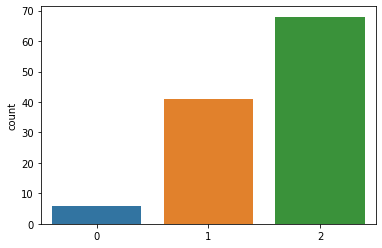

In [17]:
sns.countplot(labels)

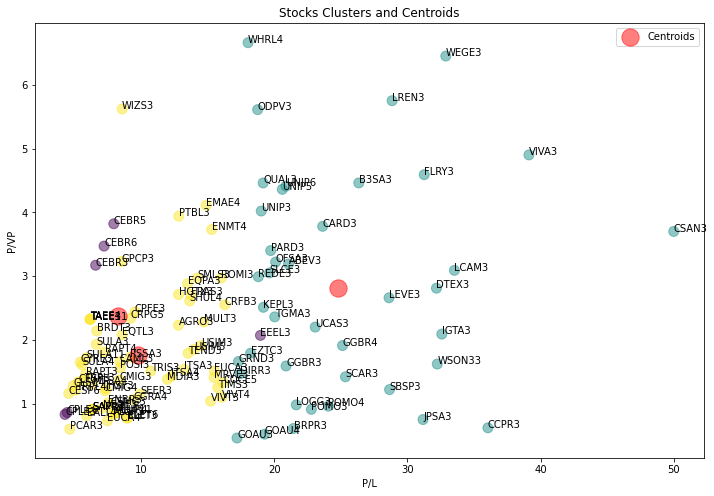

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], s = 100, c = kmeans.labels_, alpha = 0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids', alpha = 0.5)
plt.title('Stocks Clusters and Centroids')
plt.xlabel('P/L')
plt.ylabel('P/VP')
plt.legend()
for i, v in zip(X, lista_tickers):
    plt.annotate(v, (i[0], i[1]))

plt.show()

In [19]:
novo_modelo = modelo.copy()

In [20]:
novo_modelo['label'] = labels

In [21]:
novo_modelo['Setor'] = lista_setores

In [22]:
nome_setores

{0: 'Saúde',
 1: 'Financeiro e Outros',
 2: 'Consumo não Cíclico',
 3: 'Bens Industriais',
 4: 'Utilidade Pública',
 5: 'Consumo Cíclico',
 6: 'Materiais Básicos',
 7: 'Petróleo. Gás e Biocombustíveis',
 8: 'Tecnologia da Informação',
 9: 'Comunicações'}

In [23]:
novo_modelo['Setor'] = novo_modelo['Setor'].replace(nome_setores.keys(), nome_setores.values())

In [24]:
novo_modelo.head()

,P/L,P/VP,Dy 12m 2021,Dl/Pl_hoje,Lpa_2020,Lpa_2019,label,Setor
Unnamed: 0,,,,,,,,
ABEV3,21.08,3.19,0.0322,-0.19,0.72,0.75,1,Consumo não Cíclico
AGRO3,12.82,2.23,0.0233,0.44,3.14,2.10,2,Consumo não Cíclico
ALUP11,8.07,0.85,0.0324,0.77,3.21,3.04,2,Utilidade Pública
ALUP3,7.90,0.83,0.0331,0.77,1.07,1.01,2,Utilidade Pública
ALUP4,8.17,0.86,0.0320,0.77,1.07,1.01,2,Utilidade Pública


<AxesSubplot:xlabel='label', ylabel='count'>

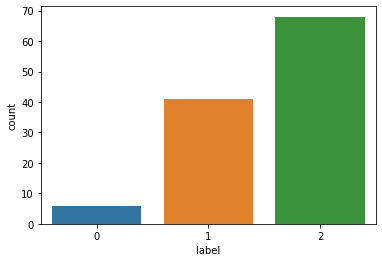

In [25]:
sns.countplot(data=novo_modelo, x='label')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Consumo não Cíclico'),
  Text(1, 0, 'Utilidade Pública'),
  Text(2, 0, 'Petróleo. Gás e Biocombustíveis'),
  Text(3, 0, 'Consumo Cíclico'),
  Text(4, 0, 'Materiais Básicos'),
  Text(5, 0, 'Bens Industriais'),
  Text(6, 0, 'Financeiro e Outros'),
  Text(7, 0, 'Tecnologia da Informação'),
  Text(8, 0, 'Comunicações')])

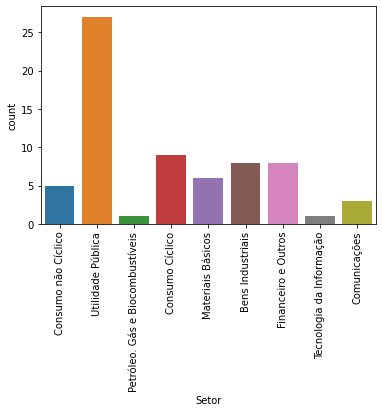

In [28]:
sns.countplot(data=novo_modelo[novo_modelo['label'] == 2], x='Setor')
plt.xticks(rotation = 90)

In [47]:
modelo_cluster = novo_modelo[(novo_modelo['label'] == 2) & (novo_modelo['Lpa_2020'] > novo_modelo['Lpa_2019'])].sort_values('P/L')
modelo_cluster

,P/L,P/VP,Dy 12m 2021,Dl/Pl_hoje,Lpa_2020,Lpa_2019,label,Setor
Unnamed: 0,,,,,,,,
CESP6,4.58,1.16,0.1037,0.14,5.28,3.55,2,Utilidade Pública
PCAR3,4.66,0.60,0.0154,0.03,8.12,2.96,2,Consumo não Cíclico
CLSC4,4.91,1.28,0.0396,0.40,13.45,5.21,2,Utilidade Pública
TRPL4,5.10,1.21,0.1197,0.14,5.10,2.68,2,Utilidade Pública
CESP3,5.28,1.34,0.0900,0.14,5.28,3.55,2,Utilidade Pública
CYRE3,5.44,1.65,0.1212,0.15,4.40,1.04,2,Consumo Cíclico
SULA4,5.57,1.61,0.0584,-1.88,1.95,1.00,2,Financeiro e Outros
TRPL3,5.72,1.36,0.1066,0.14,5.10,2.68,2,Utilidade Pública
RAPT3,5.85,1.46,0.0540,0.43,1.92,0.85,2,Bens Industriais


In [55]:
modelo_cluster.sample(frac=1).drop_duplicates(['Setor'])

,P/L,P/VP,Dy 12m 2021,Dl/Pl_hoje,Lpa_2020,Lpa_2019,label,Setor,Sub_setor
Unnamed: 0,,,,,,,,,
PSSA3,9.20,1.73,0.0583,-1.17,5.22,4.27,2,Financeiro e Outros,Previdência e Seguros
BRDT3,6.68,2.14,0.1112,0.43,3.35,1.90,2,Petróleo. Gás e Biocombustíveis,Petróleo. Gás e Biocombustíveis
CRPG5,9.24,2.34,0.0150,-0.54,6.36,4.73,2,Materiais Básicos,Químicos
EALT4,5.93,0.81,0.0090,0.37,1.12,0.75,2,Bens Industriais,Máquinas e Equipamentos
EQPA3,13.50,2.88,0.0638,0.52,0.33,0.21,2,Utilidade Pública,Energia Elétrica
HGTX3,12.82,2.71,0.0163,-0.11,2.11,1.32,2,Consumo Cíclico,Tecidos. Vestuário e Calçados
MDIA3,11.98,1.38,0.0188,0.05,2.25,1.64,2,Consumo não Cíclico,Alimentos Processados
POSI3,8.46,1.56,0.0028,0.21,1.35,0.19,2,Tecnologia da Informação,Computadores e Equipamentos


In [31]:
tickers_final = novo_modelo[(novo_modelo['label'] == 2) & (novo_modelo['Lpa_2020'] > novo_modelo['Lpa_2019'])].sort_values('P/L').index.tolist()

In [33]:
tickers_final[:5]

['CESP6', 'PCAR3', 'CLSC4', 'TRPL4', 'CESP3']

In [34]:
# dicionario com todas as ações por linha do tickers_final
lista_tickers_final = []
dicionario_tickers_final = {}
for i, v in zip((range(len(tickers_final))), tickers_final):
    dicionario_tickers_final[i] = v
    lista_tickers_final.append(dicionario_tickers_final)

In [37]:
url = 'https://statusinvest.com.br/acoes/'

In [40]:
import json
from bs4 import BeautifulSoup

In [38]:
dados = []

In [41]:
import requests

for i, v in zip(tickers_final, (range(len(tickers_final)))):
    print(f'{v}.{i}')
    
    headers = {
    'authority': 'statusinvest.com.br',
    'sec-ch-ua': '"Google Chrome";v="89", "Chromium";v="89", ";Not A Brand";v="99"',
    'accept': '*/*',
    'x-requested-with': 'XMLHttpRequest',
    'sec-ch-ua-mobile': '?0',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36',
    'content-type': 'application/x-www-form-urlencoded; charset=UTF-8',
    'origin': 'https://statusinvest.com.br',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-mode': 'cors',
    'sec-fetch-dest': 'empty',
    'referer': url + str(i),
    'accept-language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
    'cookie': '_adasys=e2299e4d-38b0-48c7-91be-a844fb91e62c; _ga=GA1.3.1768435062.1608297004; G_ENABLED_IDPS=google; __cfduid=d96cf593e372b319fd9ac85a0385fd3971614276176; denakop_freq={}; _gid=GA1.3.490929924.1615153324; __cf_bm=ccb5439cbc002734ed38f28e7c99677ec0b5afff-1615325452-1800-AWbw2mlOXKHt6BZ0dybIWT1O8Z4S9u6Mv7pm7/qkTNvQPFa+jTjP1n06mQmPXqmE938CAjZonuuP2B6noCkuoBpP5ouTIc/MWeUoxtuhdKfJ05v24zpwzU/CpAosevhANA==; _gat_gtag_UA_142136095_1=1',
    }

    data = {
      'ticker': str(i),
      'time': '5'
    }

    response = requests.post('https://statusinvest.com.br/acao/indicatorhistorical', headers=headers, data=data)

    r = response.json()

    c = requests.get(url + str(i)).content
    soup = BeautifulSoup(c)
    
    # Coletando informações para DataFrame
    dado = {}
    
    try:    
        dado['Sub_setor'] = soup.find('div', {'class':'info pl-md-2 pr-md-2'}).find('strong', {'class':'value'}).getText()
    except:
        dado['Sub_setor'] = np.NaN

    # Adicionando resultado a lista de cards
    dados.append(dado)

0.CESP6
1.PCAR3
2.CLSC4
3.TRPL4
4.CESP3
5.CYRE3
6.SULA4
7.TRPL3
8.RAPT3
9.SULA11
10.EALT4
11.TAEE4
12.TAEE11
13.TAEE3
14.MTSA4
15.SULA3
16.BRDT3
17.NEOE3
18.RAPT4
19.JHSF3
20.EUCA4
21.ENBR3
22.ALUP3
23.ALUP11
24.ALUP4
25.CAML3
26.POSI3
27.PSSA3
28.CRPG5
29.CPFE3
30.SEER3
31.MDIA3
32.AGRO3
33.HGTX3
34.PTBL3
35.EQPA3
36.SHUL4
37.FRAS3
38.USIM5
39.USIM3
40.MULT3
41.EMAE4
42.ENMT4
43.EUCA3
44.ROMI3
45.CRFB3


In [44]:
dataset = pd.DataFrame(dados)
dataset.head(5)

,Sub_setor
0,Energia Elétrica
1,Comércio e Distribuição
2,Energia Elétrica
3,Energia Elétrica
4,Energia Elétrica


In [45]:
lista_sub_setor = dataset['Sub_setor'].tolist()

In [48]:
modelo_cluster['Sub_setor'] = lista_sub_setor

In [54]:
modelo_cluster

,P/L,P/VP,Dy 12m 2021,Dl/Pl_hoje,Lpa_2020,Lpa_2019,label,Setor,Sub_setor
Unnamed: 0,,,,,,,,,
CESP6,4.58,1.16,0.1037,0.14,5.28,3.55,2,Utilidade Pública,Energia Elétrica
PCAR3,4.66,0.60,0.0154,0.03,8.12,2.96,2,Consumo não Cíclico,Comércio e Distribuição
CLSC4,4.91,1.28,0.0396,0.40,13.45,5.21,2,Utilidade Pública,Energia Elétrica
TRPL4,5.10,1.21,0.1197,0.14,5.10,2.68,2,Utilidade Pública,Energia Elétrica
CESP3,5.28,1.34,0.0900,0.14,5.28,3.55,2,Utilidade Pública,Energia Elétrica
CYRE3,5.44,1.65,0.1212,0.15,4.40,1.04,2,Consumo Cíclico,Construção Civil
SULA4,5.57,1.61,0.0584,-1.88,1.95,1.00,2,Financeiro e Outros,Previdência e Seguros
TRPL3,5.72,1.36,0.1066,0.14,5.10,2.68,2,Utilidade Pública,Energia Elétrica
RAPT3,5.85,1.46,0.0540,0.43,1.92,0.85,2,Bens Industriais,Material de Transporte


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Energia Elétrica'),
  Text(1, 0, 'Comércio e Distribuição'),
  Text(2, 0, 'Construção Civil'),
  Text(3, 0, 'Previdência e Seguros'),
  Text(4, 0, 'Material de Transporte'),
  Text(5, 0, 'Máquinas e Equipamentos'),
  Text(6, 0, 'Petróleo. Gás e Biocombustíveis'),
  Text(7, 0, 'Madeira e Papel'),
  Text(8, 0, 'Alimentos Processados'),
  Text(9, 0, 'Computadores e Equipamentos'),
  Text(10, 0, 'Químicos'),
  Text(11, 0, 'Diversos'),
  Text(12, 0, 'Agropecuária'),
  Text(13, 0, 'Tecidos. Vestuário e Calçados'),
  Text(14, 0, 'Construção e Engenharia'),
  Text(15, 0, 'Siderurgia e Metalurgia'),
  Text(16, 0, 'Exploração de Imóveis')])

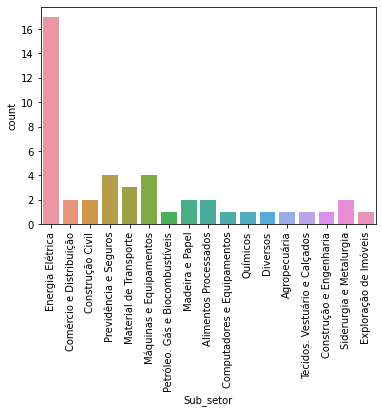

In [51]:
sns.countplot(data=modelo_cluster, x='Sub_setor')
plt.xticks(rotation = 90)